# 0) Packages and Configuration

In [1]:
using Plots, DataFrames, CSV, Flux
using Statistics: mean, std

# 1) Salary Regression

In [2]:
df = CSV.read("Salary_Data.csv", DataFrame)
x, y = df.YearsExperience, df.Salary

θ₀, θ₁ = [ones(length(x)) x] \ y

2-element Vector{Float64}:
 25792.200198668725
  9449.96232145508

In [3]:
ŷ = θ₀ .+ θ₁ * x

30-element Vector{Float64}:
  36187.158752269315
  38077.15121656033
  39967.14368085134
  44692.12484157889
  46582.117305869906
  53197.09093088846
  54142.08716303396
  56032.07962732498
  56032.07962732498
  60757.06078805252
  62647.05325234353
  63592.04948448904
  63592.04948448904
      ⋮
  81546.97789525369
  82491.9741273992
  90051.94398456326
  92886.93268099979
 100446.90253816385
 103281.89123460036
 108006.87239532791
 110841.86109176444
 115566.84225249197
 116511.83848463748
 123126.81210965605
 125016.80457394705

In [4]:
R² = 1 - sum(t -> t^2, y - ŷ) / sum(t -> t^2, y .- mean(y))

0.9569566641435086

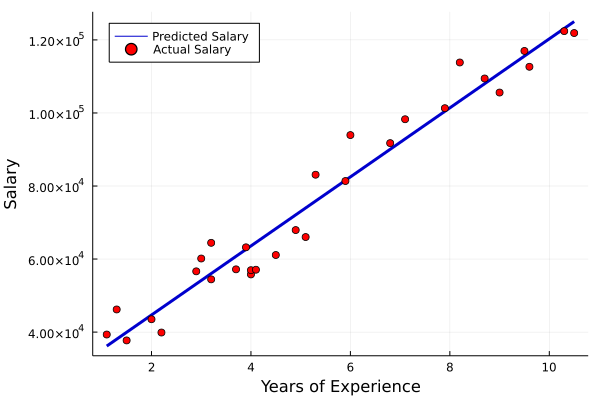

In [5]:
plot(x, ŷ, xlabel = "Years of Experience", ylabel = "Salary", label="Predicted Salary", color=:mediumblue,
    lw=3, legend=:topleft)
scatter!(x, y, lw=3, label="Actual Salary", color=:red)

$\theta_0$ is interpreted as the minimum salary, when someone has no experience. $\theta_1$ is interpreted as the amount of salary a person gains with each year of experience.

So here the minimum salary is around 25800 and a person gains around 9500 with each year of experience.

# 2) US Startups
## a)

In [6]:
df = CSV.read("50_Startups.csv", DataFrame)
expense_df = df[:, 1:end-2]
y = df.Profit

50-element Vector{Float64}:
 192261.83
 191792.06
 191050.39
 182901.99
 166187.94
 156991.12
 156122.51
 155752.6
 152211.77
 149759.96
 146121.95
 144259.4
 141585.52
      ⋮
  81229.06
  81005.76
  78239.91
  77798.83
  71498.49
  69758.98
  65200.33
  64926.08
  49490.75
  42559.73
  35673.41
  14681.4

In [7]:
for (expense_label, x) in zip(names(expense_df), eachcol(expense_df))
    θ₀, θ₁ = [ones(length(x)) x] \ y
    ŷ = θ₀ .+ θ₁ * x
    R² = 1 - sum(t -> t^2, y - ŷ) / sum(t -> t^2, y .- mean(y))
    display("text/markdown", expense_label * ":\$\\quad \\theta_0 = $θ₀,\\ \\theta_1 = $θ₁,\\ R^2 = $R²\$")
end

R&D Spend:$\quad \theta_0 = 49032.89914125211,\ \theta_1 = 0.8542913709388095,\ R^2 = 0.9465353160804393$

Administration:$\quad \theta_0 = 76974.4713054176,\ \theta_1 = 0.2887492023552263,\ R^2 = 0.04028714077757223$

Marketing Spend:$\quad \theta_0 = 60003.54881577168,\ \theta_1 = 0.24645926444976787,\ R^2 = 0.5591535746115515$

Based on the $R^2$ scores, the R&D spenditure is the best (or even, the only good) explanation for US startups profits.

## b)

In [8]:
x = [ones(nrow(df)) df."R&D Spend"]
θs = x \ y
ŷ = x * θs
R² = 1 - sum(t -> t^2, y - ŷ) / sum(t -> t^2, y .- mean(y))

display("text/markdown", "Only including the R&D expenses:\
    \$\\quad \\theta_0 = $(θs[1]),\\ \\theta_1 = $(θs[2]),\\ R^2 = $R²\$")

x = [x df."Marketing Spend"]
θs = x \ y
ŷ = x * θs
R² = 1 - sum(t -> t^2, y - ŷ) / sum(t -> t^2, y .- mean(y))

display("text/markdown", "Adding marketing expenses:\
    \$\\quad \\theta_0 = $(θs[1]),\\ \\theta_1 = $(θs[2]),\\ \\theta_2 = $(θs[3]),\\ R^2 = $R²\$")

x = [x df."Administration"]
θs = x \ y
ŷ = x * θs
R² = 1 - sum(t -> t^2, y - ŷ) / sum(t -> t^2, y .- mean(y))

display("text/markdown", "Adding administration expenses (including every expense):\
    \$\\quad \\theta_0 = $(θs[1]),\\ \\theta_1 = $(θs[2]),\\ \\theta_2 = $(θs[3]),\
    \\ \\theta_3 = $(θs[4]),\\ R^2 = $R²\$")

Only including the R&D expenses:$\quad \theta_0 = 49032.89914125211,\ \theta_1 = 0.8542913709388095,\ R^2 = 0.9465353160804393$

Adding marketing expenses:$\quad \theta_0 = 46975.864220719974,\ \theta_1 = 0.796584044055988,\ \theta_2 = 0.02990787520578514,\ R^2 = 0.9504503015559762$

Adding administration expenses (including every expense):$\quad \theta_0 = 50122.19298986527,\ \theta_1 = 0.8057150499157437,\ \theta_2 = 0.027228064800818776,\ \theta_3 = -0.026815968394751102,\ R^2 = 0.9507459940683246$

Adding new expenses barely changes $R^2$, so it is not very beneficial to add new expenses to our analysis.

## c)

In [9]:
for state in unique(df.State)
    y = df[df.State .== state, "Profit"]
    println()
    display("text/markdown", "State: $state")
    for expense_label in names(expense_df)
        x = df[df.State .== state, expense_label]
        θ₀, θ₁ = [ones(length(x)) x] \ y
        ŷ = θ₀ .+ θ₁ * x
        R² = 1 - sum(t -> t^2, y - ŷ) / sum(t -> t^2, y .- mean(y))
        display("text/markdown", expense_label * ":\$\\quad \\theta_0 = $θ₀,\\ \\theta_1 = $θ₁,\\ R^2 = $R²\$")
    end
end

State: New York

R&D Spend:$\quad \theta_0 = 51796.186369597584,\ \theta_1 = 0.8131794658029956,\ R^2 = 0.9533773727267224$

Administration:$\quad \theta_0 = 50559.00753006461,\ \theta_1 = 0.5199574986189411,\ R^2 = 0.15878011823703253$

Marketing Spend:$\quad \theta_0 = 68197.23647833843,\ \theta_1 = 0.22186556576949434,\ R^2 = 0.6564863927840396$

State: California

R&D Spend:$\quad \theta_0 = 43875.02522123144,\ \theta_1 = 0.9284303973517374,\ R^2 = 0.9507489340960603$

Administration:$\quad \theta_0 = 73381.44098388457,\ \theta_1 = 0.2527918616756587,\ R^2 = 0.026135831961210942$

Marketing Spend:$\quad \theta_0 = 48310.63735851153,\ \theta_1 = 0.3045593013838522,\ R^2 = 0.6304933320585939$

State: Florida

R&D Spend:$\quad \theta_0 = 53116.732099269604,\ \theta_1 = 0.8133551243584265,\ R^2 = 0.9411272155908165$

Administration:$\quad \theta_0 = 125922.46573224584,\ \theta_1 = -0.0587049854602307,\ R^2 = 0.001744100902286383$

Marketing Spend:$\quad \theta_0 = 63024.749110378274,\ \theta_1 = 0.2254102974943506,\ R^2 = 0.3242676928983782$

In New York and California, marketing has a larger effect the profit than in Florida.

# 3) Social Network Ads
## a)

In [26]:
df = CSV.read("Social_Network_Ads.csv", DataFrame)

xs = Matrix{Float32}(vcat(df.Age', df.EstimatedSalary'))
ys = permutedims(df."Purchased")

# Normalization
xs .-= mean(xs, dims=2)
xs ./= std(xs, dims=2)

2×400 Matrix{Float32}:
 -1.77957  -0.25327  -1.11181   -1.01642   …   1.17764  -0.157876   1.08224
 -1.48818  -1.45885  -0.784307  -0.373714     -1.45885  -1.07759   -0.989604

In [27]:
model = Flux.Dense(size(xs)[1] => 1, σ)
loss(x, y) = Flux.binarycrossentropy(model(x), y)
optimiser = Flux.Descent()
parameters = Flux.params(model)

Params([Float32[-1.1812725 0.5098878], Float32[0.0]])

In [28]:
loss(xs, ys)

1.1178795f0

In [29]:
for _ in 1:10000
    Flux.train!(loss, parameters, [(xs, ys)], optimiser)
end

In [30]:
loss(xs, ys)

0.34631392f0

### Confusion Matrix

In [60]:
function confusion_matrix(predictions, ys)
    predicted_positives = sum(predictions)
    predicted_negatives = length(predictions) - predicted_positives
    actual_positives = sum(ys)
    actual_negatives = length(ys) - actual_positives

    true_positives = sum(predictions .& ys)
    false_positives = predicted_positives - true_positives
    true_negatives = sum(.~predictions .& .~ys)
    false_negatives = predicted_negatives - true_negatives

    precision = true_positives / predicted_positives
    recall = true_positives / actual_positives
    f1score = 2 * precision * recall / (precision + recall)

    return (true_positives, true_negatives, false_positives, false_negatives,
        precision, recall, f1score)
end

confusion_matrix (generic function with 1 method)

In [44]:
predictions = model(xs) .> 0.5
(true_positives, true_negatives, false_positives, false_negatives,
    precision, recall, f1score) = confusion_matrix(predictions, ys)

println("True Positives = $true_positives\nTrue Negatives = $true_negatives\n"
    * "False Positives = $false_positives\nFalse Negatives = $false_negatives\n")
println("Precision = $precision\n"
    * "Recall = $recall\n"
    * "F1 Score = $f1score")

True Positives = 102
True Negatives = 236
False Positives = 21
False Negatives = 41

Precision = 0.8292682926829268
Recall = 0.7132867132867133
F1 Score = 0.7669172932330828


In [16]:
model.weight

1×2 Matrix{Float32}:
 2.4476  1.22409

Based on the precision, recall and the F1 Score, the model can correlate the data fairly well. Based on the weights, age is two times more important than the salary in predicting whether a person will by the product or not.

## b)

In [57]:
using Random: randperm
function train_test_split(xs, ys, test_size)
    indices = randperm(size(xs)[2])
    test_split = round(Int, size(xs)[2] * test_size)
    test_indices = indices[1:test_split]
    train_indices = indices[test_split+1:end]
    return (xs[:, train_indices], ys[:, train_indices], xs[:, test_indices], ys[:, test_indices])
end

train_test_split (generic function with 1 method)

### No Threshold Tuning

In [66]:
for train_set_size in (0.2, 0.5, 0.8)
    xtrain, ytrain, xtest, ytest, = train_test_split(xs, ys, 1-train_set_size)
    model = Flux.Dense(size(xtrain)[1] => 1, σ)
    loss(x, y) = Flux.binarycrossentropy(model(x), y)
    optimiser = Flux.Descent()
    parameters = Flux.params(model)
    for _ in 1:10000
        Flux.train!(loss, parameters, [(xtrain, ytrain)], optimiser)
    end

    predictions = model(xtest) .> 0.5
    (true_positives, true_negatives, false_positives, false_negatives,
        precision, recall, f1score) = confusion_matrix(predictions, ytest)
    println("Train Set Size = $(train_set_size * 100)%\n"
            * "True Positives = $true_positives\n"
            * "True Negatives = $true_negatives\n"
            * "False Positives = $false_positives\n"
            * "False Negatives = $false_negatives\n"
            * "Precision = $precision\n"
            * "Recall = $recall\n"
            * "F1 Score = $f1score\n")
end

Train Set Size = 20.0%
True Positives = 82
True Negatives = 187
False Positives = 20
False Negatives = 31
Precision = 0.803921568627451
Recall = 0.7256637168141593
F1 Score = 0.7627906976744186

Train Set Size = 50.0%
True Positives = 52
True Negatives = 122
False Positives = 9
False Negatives = 17
Precision = 0.8524590163934426
Recall = 0.7536231884057971
F1 Score = 0.8

Train Set Size = 80.0%
True Positives = 20
True Negatives = 46
False Positives = 5
False Negatives = 9
Precision = 0.8
Recall = 0.6896551724137931
F1 Score = 0.7407407407407408



### With Threshold Tuning

In [65]:
for train_set_size in (0.2, 0.5, 0.8)
    xtrain, ytrain, xtest, ytest, = train_test_split(xs, ys, 1-train_set_size)
    model = Flux.Dense(size(xtrain)[1] => 1, σ)
    loss(x, y) = Flux.binarycrossentropy(model(x), y)
    optimiser = Flux.Descent()
    parameters = Flux.params(model)
    for _ in 1:10000
        Flux.train!(loss, parameters, [(xtrain, ytrain)], optimiser)
    end

    best_thresh = 0.3
    maxf1 = 0.0
    (true_positives, true_negatives, false_positives, false_negatives,
            precision, recall, f1score) = zeros(7)
    for thresh in 0.2:0.05:0.8
        predictions = model(xtest) .> thresh
        (tp, tn, fp, fn, prec, rec, f1) = confusion_matrix(predictions, ytest)
        if f1 > maxf1
            (true_positives, true_negatives, false_positives, false_negatives,
                precision, recall, f1score) = (tp, tn, fp, fn, prec, rec, f1)
            maxf1 = f1
            best_thresh = thresh
        end
    end
    println("Train Set Size = $(train_set_size * 100)%\n"
            * "Best Threshold = $best_thresh\n"
            * "True Positives = $true_positives\n"
            * "True Negatives = $true_negatives\n"
            * "False Positives = $false_positives\n"
            * "False Negatives = $false_negatives\n"
            * "Precision = $precision\n"
            * "Recall = $recall\n"
            * "F1 Score = $f1score\n")
end

Train Set Size = 20.0%
Best Threshold = 0.4
True Positives = 97
True Negatives = 175
False Positives = 33
False Negatives = 15
Precision = 0.7461538461538462
Recall = 0.8660714285714286
F1 Score = 0.8016528925619835

Train Set Size = 50.0%
Best Threshold = 0.5
True Positives = 63
True Negatives = 115
False Positives = 8
False Negatives = 14
Precision = 0.8873239436619719
Recall = 0.8181818181818182
F1 Score = 0.8513513513513514

Train Set Size = 80.0%
Best Threshold = 0.35
True Positives = 22
True Negatives = 49
False Positives = 5
False Negatives = 4
Precision = 0.8148148148148148
Recall = 0.8461538461538461
F1 Score = 0.830188679245283



By tuning the acceptance threshold, we are able to get better results. However, increasing the training set size does not seem to improve accuracy by a large margin. This indicates we can improve the accuracy by using more features (our model possibly has high bias).

# 4) Gold Price Prediction
## Preparing the Data

In [76]:
using MarketData, Dates

CSV.write("market_data/gold.csv", yahoo("GC=F",
    YahooOpt(period1=DateTime("2014-12-31"), period2=DateTime("2022-05-01"))))
CSV.write("market_data/crudeoil.csv", yahoo("CL=F",
    YahooOpt(period1=DateTime("2015-01-01"), period2=DateTime("2022-05-01"))))
# some manual processing is done after this

"market_data/crudeoil.csv"

In [94]:
for name in ("gold", "crudeoil")
    df = CSV.read("market_data/$name.csv", DataFrame)
    CSV.write("processed_data/$name.csv",
        DataFrame("date" => df.timestamp, "close" => df.Close))
end

In [95]:
df = CSV.read("processed_data/gold.csv", DataFrame)
gold_price, gold_return = df.close, df."return"
gold_price_actual = gold_price[2:end]
gold_price_lag = gold_price[1:end-1]

df = CSV.read("processed_data/crudeoil.csv", DataFrame)
crudeoil_price = df.close
dates = df.date

df = CSV.read("processed_data/federal.csv", DataFrame)
federal_rate = df."EFFR"

1844-element Vector{Float64}:
 0.12
 0.12
 0.12
 0.12
 0.12
 0.12
 0.12
 0.12
 0.12
 0.12
 0.13
 0.12
 0.12
 ⋮
 0.33
 0.33
 0.33
 0.33
 0.33
 0.33
 0.33
 0.33
 0.33
 0.33
 0.33
 0.33

In [96]:
using Dates
test_index = findfirst(==(Date(2022, 2, 1)), dates)
gold_price_train, gold_price_test = gold_price_actual[1:test_index-1], gold_price_actual[test_index:end]
gold_price_lag_train, gold_price_lag_test = gold_price_lag[1:test_index-1], gold_price_lag[test_index:end]
crudeoil_price_train, crudeoil_price_test = crudeoil_price[1:test_index-1], crudeoil_price[test_index:end]
federal_rate_train, federal_rate_test = federal_rate[1:test_index-1], federal_rate[test_index:end]

([0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12  …  0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08], [0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08  …  0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33])

## Linear Regression

Only with the first lag of gold:


$\quad \theta_0 = 1.917753633717472,\ \theta_1 = 0.9988901138181832,\ R^2 = 0.8464973761576927$

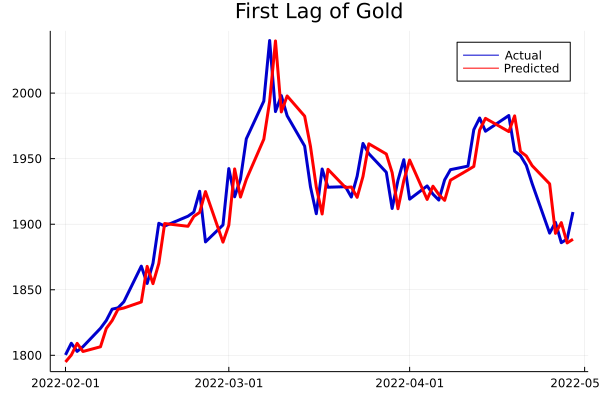

In [121]:
ytrain, ytest = gold_price_train, gold_price_test
xtrain, xtest = gold_price_lag_train, gold_price_lag_test

θ₀lag, θ₁lag = [ones(size(xtrain)[1]) xtrain] \ ytrain
ypredict_lag = θ₀lag .+ θ₁lag * xtest
R²lag = 1 - sum(t -> t^2, ytest - ypredict_lag) / sum(t -> t^2, ytest .- mean(ytest))

println("Only with the first lag of gold:")
display("text/markdown", "\$\\quad \\theta_0 = $θ₀lag,\\ \\theta_1 = $θ₁lag,\\ R^2 = $R²lag\$")

plot(dates[test_index:end], ytest, label="Actual", title="First Lag of Gold", lw=3, color=:mediumblue)
plot!(dates[test_index:end], ypredict_lag, label="Predicted", lw=3, color=:red)

With the first lag of gold and crude oil prices:


$\quad \theta_0 = 3.307132704788682,\ \theta_1 = 0.9991125711133599,\ \theta_2 = -0.03183464685533078 \ R^2 = 0.8430710322150009$

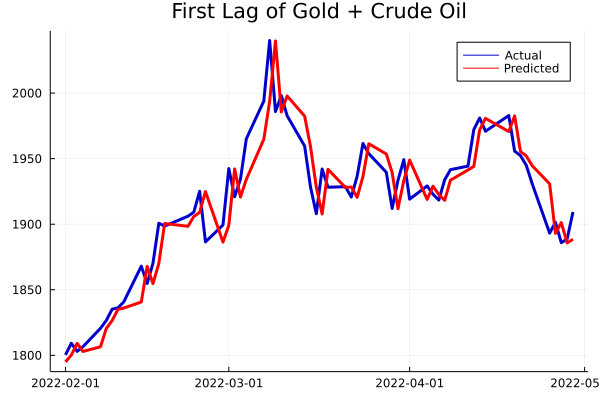

In [115]:
xtrain, xtest = [xtrain crudeoil_price_train], [xtest crudeoil_price_test]

θ₀crude, θ₁crude, θ₂crude = [ones(size(xtrain)[1]) xtrain] \ ytrain
ypredict_crude = θ₀crude .+ θ₁crude * xtest[:, 1] .+ θ₂crude * xtest[:, 2]
R²crude = 1 - sum(t -> t^2, ytest - ypredict_crude) / sum(t -> t^2, ytest .- mean(ytest))

println("With the first lag of gold and crude oil prices:")
display("text/markdown", "\$\\quad \\theta_0 = $θ₀crude,\\ \\theta_1 = $θ₁crude,\
    \\ \\theta_2 = $θ₂crude \\ R^2 = $R²crude\$")

plot(dates[test_index:end], ytest, label="Actual", title="First Lag of Gold + Crude Oil", lw=3, color=:mediumblue)
plot!(dates[test_index:end], ypredict_lag, label="Predicted", lw=3, color=:red)

With the first lag of gold, crude oil prices, and federal interest rate:


$\quad \theta_0 = 2.857276647394864,\ \theta_1 = 0.9995027480992472,\ \theta_2 = -0.03866112044069085,\ \theta_3 = 0.3109462223775849 \ R^2 = 0.8419197167974111$

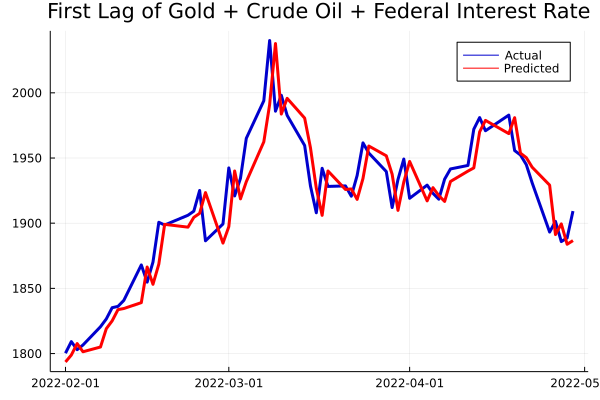

In [116]:
xtrain, xtest = [xtrain federal_rate_train], [xtest federal_rate_test]

θ₀federal, θ₁federal, θ₂federal, θ₃federal = [ones(size(xtrain)[1]) xtrain] \ ytrain
ypredict_federal = θ₀federal .+ θ₁federal * xtest[:, 1] .+ θ₂federal * xtest[:, 2] .+ θ₃federal * xtest[:, 3]
R²federal = 1 - sum(t -> t^2, ytest - ypredict_federal) / sum(t -> t^2, ytest .- mean(ytest))

println("With the first lag of gold, crude oil prices, and federal interest rate:")
display("text/markdown", "\$\\quad \\theta_0 = $θ₀federal,\\ \\theta_1 = $θ₁federal,\
    \\ \\theta_2 = $θ₂federal,\\ \\theta_3 = $θ₃federal \\ R^2 = $R²federal\$")

plot(dates[test_index:end], ytest, label="Actual", title="First Lag of Gold + Crude Oil + Federal Interest Rate",
    lw=3, color=:mediumblue)
plot!(dates[test_index:end], ypredict_federal, label="Predicted", lw=3, color=:red)

In [117]:
println("Mean squared error for prediction based on the first lag of gold = \
    $(mean(t -> t^2, (ytest - ypredict_lag) ./ ytest))")
println("Mean squared error for prediction based on the first lag of gold \
    + crude oil prices = $(mean(t -> t^2, (ytest - ypredict_crude) ./ ytest))")
println("Mean squared error for prediction based on the first lag of gold \
    + crude oil prices + federal interest rate = $(mean(t -> t^2, (ytest - ypredict_federal) ./ ytest))")

Mean squared error for prediction based on the first lag of gold = 0.00011075983111198461
Mean squared error for prediction based on the first lag of gold + crude oil prices = 0.00011316598763522458
Mean squared error for prediction based on the first lag of gold + crude oil prices + federal interest rate = 0.00011399232422572957


As you can see, adding new features for prediction increases error. This is because there is no linear relation between gold prices and crude oil prices or federal funds rates.